# Introduction to Clustering
Here we're going to have quick introduction about clustering algorithms in Python and some common caveats. First let us load the required libraries

In [2]:
import matplotlib.pyplot as plt             # basic plotting library
import matplotlib.cm as cm
import numpy as np                          # library used for linear algebra and vectorized operations
import pandas as pd                         # library for working with small to medium size datasets (around 100k observations)
import seaborn as sns                       # advanced plotting library
from sklearn.cluster import KMeans          # sklearn is a library used for machine learning models
from sklearn_extra.cluster import KMedoids  # sklearn_extra is an extension of sklearn with additional machine learning algorithms
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings(action='ignore')     # if getting some boring warnings

Now let us generate three independent multivariate normal distributions. They will have the same covariance matrix but different means (i.e.: the same shape but in different places of the plane).

**Important Note:** All the examples presented in this notebook overlook the topic of data normalization/standarization and assume the input data are in similar ranges.

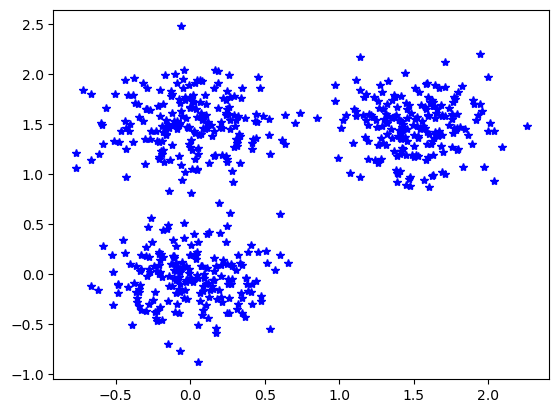

In [3]:
# remember setting a seed for reproducibility
np.random.seed(123)
n = 200                                     # number of observations
cov_mat = [[0.075, 0], [0, 0.075]]          # covariance matrix to use

# creating the distributions
dbn1 = {'mean': [0, 0], 'cov': cov_mat, 'n': n, 'y1': [], 'y2': []}
dbn2 = {'mean': [0, 1.5], 'cov': cov_mat, 'n': n, 'y1': [], 'y2': []}
dbn3 = {'mean': [1.5, 1.5], 'cov': cov_mat, 'n': n, 'y1': [], 'y2': []}

dbn1['y1'], dbn1['y2'] = np.random.multivariate_normal(dbn1['mean'], dbn1['cov'], dbn1['n']).T
dbn2['y1'], dbn2['y2'] = np.random.multivariate_normal(dbn2['mean'], dbn2['cov'], dbn2['n']).T
dbn3['y1'], dbn3['y2'] = np.random.multivariate_normal(dbn3['mean'], dbn3['cov'], dbn3['n']).T

# joining the distributions in the same dataset
y1 = np.concatenate((dbn1['y1'],  dbn2['y1'],  dbn3['y1']))
y2 = np.concatenate((dbn1['y2'], dbn2['y2'], dbn3['y2']))

dataset = pd.DataFrame(np.array([y1, y2]).T, columns=['y1', 'y2'])

# plot the data of color blue using a * code
plt.plot(dataset['y1'], dataset['y2'], 'b*')
# required to plot inside the notebook
plt.show()

From the previous example we can clearly identify three groups, which coincides with the data generating process; now let us see how the common clustering algorithms perform assuming we didn't have that information.

In [4]:
# first let us begin with k-Means
kmeans_1 = KMeans(n_clusters = 3,                   # the number of clusters we guess
                      random_state = 50,            # k-Means depends on an initial random set of points, so this option ensures reproducibility
                      max_iter = 1000,              # maximum number of iterations
                      n_init = 1)                   # number of initial points to try, a number can be specified or left to auto
# fit dataset
kmeans_1.fit(dataset)
#extract the labels and add them to a column
dataset_labeled = dataset.copy()
dataset_labeled["labels"] = kmeans_1.labels_ + 1

# we can see that, given the 'correct' number of clusters, the centroids are fairly close to the theoretical means
print(kmeans_1.cluster_centers_[:, 0:2])

[[ 1.50166424  1.47980287]
 [-0.00301675 -0.03153003]
 [-0.00277036  1.51270758]]


Let us plot the results to see how well did the algorithm perform

Text(0.5, 0, 'Feature 2 (y2)')

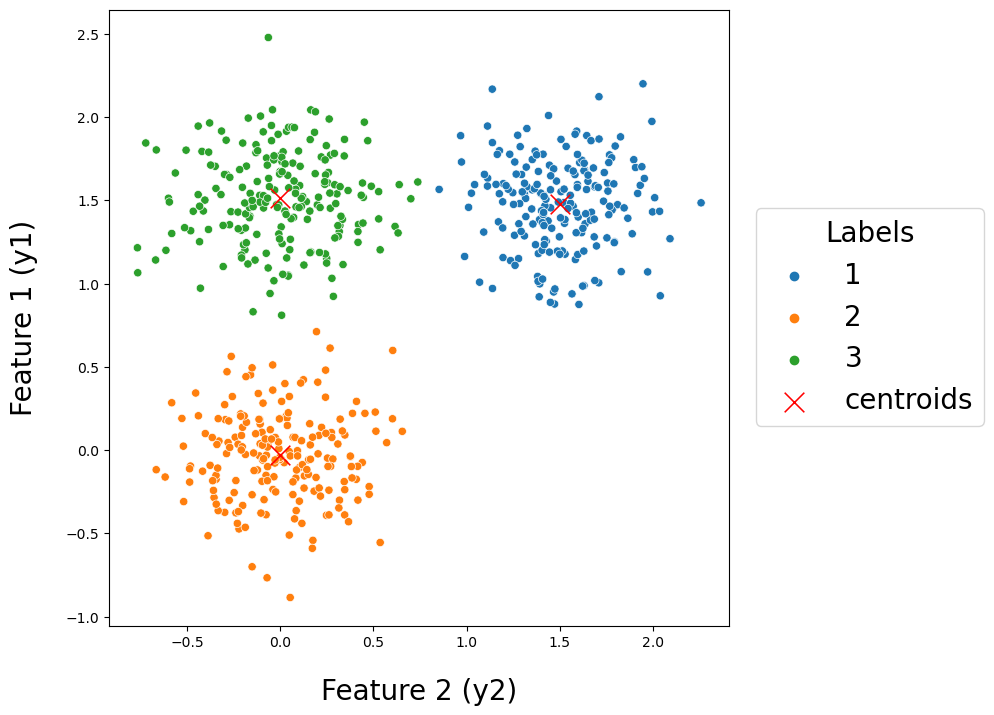

In [5]:
# get the centroids and store them in a dataframe
centres = pd.DataFrame(kmeans_1.cluster_centers_[:, 0:2], columns = ["y1", "y2"])

# the next lines are for plotting and 'prettyfying'
fig, ax = plt.subplots(1,1, figsize = (8,8))

sns.scatterplot(data = dataset_labeled, x = "y1", y = "y2", hue = "labels", palette = "tab10" )
sns.scatterplot(data = centres, x = "y1", y = "y2", marker = "x", facecolor = "red", s = 200, label = "centroids")

ax.legend(fontsize = 20, title_fontsize = 20, title = "Labels", bbox_to_anchor = (1.02, 0.7))
ax.set_ylabel("Feature 1 (y1)", fontsize = 20, labelpad = 20)
ax.set_xlabel("Feature 2 (y2)", fontsize = 20, labelpad = 20)

But what happens if we don't use the 'correct' number of centroids?

Text(0.5, 0, 'Feature 2 (y2)')

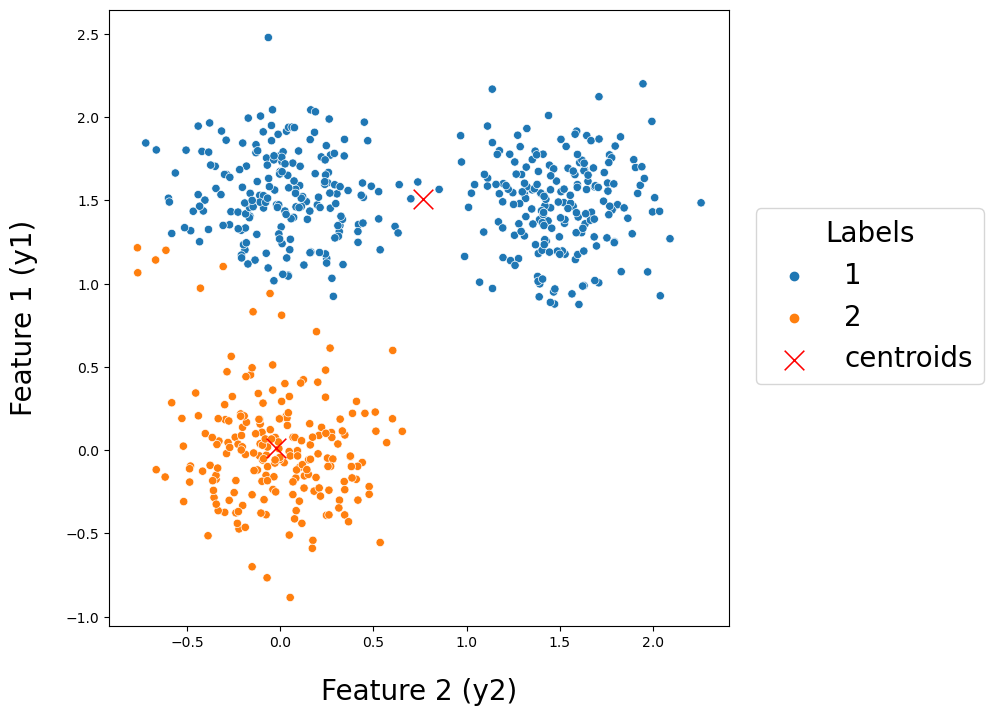

In [9]:
# copy-paste from the previous clustering code, changing only the variable's name and the number of centroids

# change this number and run the cell again to see what happens
clusters = 2
kmeans_1 = KMeans(n_clusters = clusters,            # the number of clusters we guess
                      random_state = 50,            # k-Means depends on an initial random set of points, so this option ensures reproducibility
                      max_iter = 1000,              # maximum number of iterations
                      n_init = 1)                   # number of initial points to try
# fit dataset
kmeans_1.fit(dataset)
#extract the labels and add them to a column
dataset_labeled = dataset.copy()
dataset_labeled["labels"] = kmeans_1.labels_ + 1

# get the centroids and store them in a dataframe
centres = pd.DataFrame(kmeans_1.cluster_centers_[:, 0:2], columns = ["x", "y"])

# the next lines are for plotting and 'prettyfying'
fig, ax = plt.subplots(1,1, figsize = (8,8))

sns.scatterplot(data = dataset_labeled, x = "y1", y = "y2", hue = "labels", palette = "tab10" )
sns.scatterplot(data = centres, x = "x", y = "y", marker = "x", facecolor = "red", s = 200, label = "centroids")

ax.legend(fontsize = 20, title_fontsize = 20, title = "Labels", bbox_to_anchor = (1.02, 0.7))
ax.set_ylabel("Feature 1 (y1)", fontsize = 20, labelpad = 20)
ax.set_xlabel("Feature 2 (y2)", fontsize = 20, labelpad = 20)

Another common clustering technique is k-Medoids, which is similar to k-Means with only one difference: **at the end of each iteration** after it calculates the centroids, it then chooses the data point closest to each of them (medoids) and uses those as *centroids* in the next iteration; that additional step implies calculating many distances, which increases the computational demand of the clustering process.

The code to perform k-Medoids clustering with Scikit-Learn is almost the same as with k-Means, the only difference is that you must install an additional package (scikit-learn-extra) and the n_init parameter is not required.

In [11]:
kmedoids = KMedoids(n_clusters = 3,                 # the number of clusters we guess
                      random_state = 50,            # k-Means depends on an initial random set of points, so this option ensures reproducibility
                      max_iter = 1000)              # maximum number of iterations
kmedoids.fit(dataset)

# getting the data is the same
print('The cluster centers (medoids) are:')
print(kmedoids.cluster_centers_)
print('The indexes of the medoids are:')
print(kmedoids.medoid_indices_)
print('The labeled observations are:')
kmedoids.labels_ + 1

The cluster centers (medoids) are:
[[-0.00751979  1.47313651]
 [ 1.49207283  1.49005682]
 [-0.00167876 -0.0436111 ]]
The indexes of the medoids are:
[346 581 130]
The labeled observations are:


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In the real world we have two problems:
- (Most of) the  data doesn't have those nice iid properties
- We ignore the true number of clusters

There are multiple heuristics to determine the 'correct' number of clusters; here we present two: the widely known elbow method and the silhouette score.

### Elbow method
Provides an initial guess but should not be the only metric as it is highly subjective and experiments have shown it to be unreliable; nevertheless is widely used  due to its intuitive formulation and ease of use. It works by calculating a performance metric for each clustering and choosing the one with the highest decrease in the marginal in performance (i.e.: diminishing return from increasing the number of clusters).

The most commonly used performance metric is the inertia or within-cluster sum-of-squares; it measures the sum of the squared distances from each datapoint to the closest centroid; its formula is:
$\sum_{i=0}^n min_{\mu_j \in C}(\|x_i - \mu_j\|^2)$
$x_i: \textrm{ith data point in }R^m$
$C: \textrm{clusters centroids}$

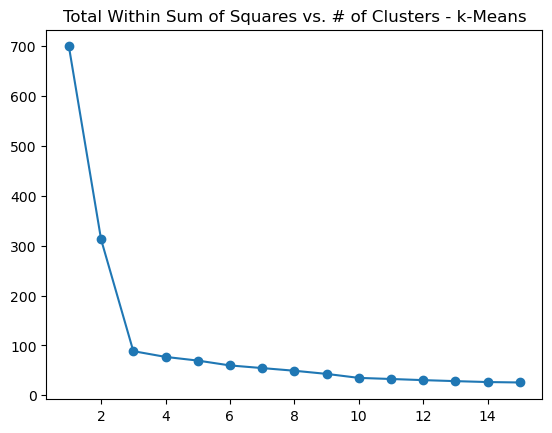

In [13]:
# try a different number of cluster arrangements
n_cluster = range(1, 16)

# when coding in general, and especially in Python, one must try to avoid for/while loops; the within brackets notation is called
# a list comprehension and is an efficient way to create lists in Python which can be then transformed in to numerical arrays.
kmeans = [ KMeans(n_clusters=i, random_state=123, n_init=1).fit(dataset) for i in n_cluster ]

# scikit learn already calculates the inertia for the clustering object in the inertia_ property
inertias = [ kmeans[i].inertia_ for i in range(len(kmeans)) ]

fig, ax = plt.subplots()
ax.plot(n_cluster, inertias, marker='o')
plt.title('Total Within Sum of Squares vs. # of Clusters - k-Means')
plt.show()

Another metric of clustering performance is the Silhouette which measures the ratio of each data point's average distance to the other members of the **same** cluster vs. the distance to the members of the **closest** different cluster. From the definition you can see that it implies calculating many distances, which limits its applicability in medium size datasets. Especially in high-dimensional spaces or when using *exotic* norms.

Silhouette score for data point $i$:
$s_i=\frac{b_i-a_i}{max(b_i,a_i)}$
$where:$
$b_i: \textrm{ Smallest average distance to all the other datapoints that are in another cluster}$
$a_i: \textrm{ Average distance to all the other datapoints that are in the same cluster}$

The Silhouette score can be calculated as an aggregated average for all data points or for each cluster label.


For n_clusters = 2 The average silhouette_score is : 0.5175871353788064
For n_clusters = 3 The average silhouette_score is : 0.6696504106369646
For n_clusters = 4 The average silhouette_score is : 0.5348973029746802
For n_clusters = 5 The average silhouette_score is : 0.42561512742810964
For n_clusters = 6 The average silhouette_score is : 0.3149235423055438
For n_clusters = 7 The average silhouette_score is : 0.33355100257826437
For n_clusters = 8 The average silhouette_score is : 0.3145007207962097
For n_clusters = 9 The average silhouette_score is : 0.3397011412434922
For n_clusters = 10 The average silhouette_score is : 0.3361455729160707
For n_clusters = 11 The average silhouette_score is : 0.3254978475849077
For n_clusters = 12 The average silhouette_score is : 0.31800749333709916
For n_clusters = 13 The average silhouette_score is : 0.319972171596346
For n_clusters = 14 The average silhouette_score is : 0.331710580963488
For n_clusters = 15 The average silhouette_score is : 0.33

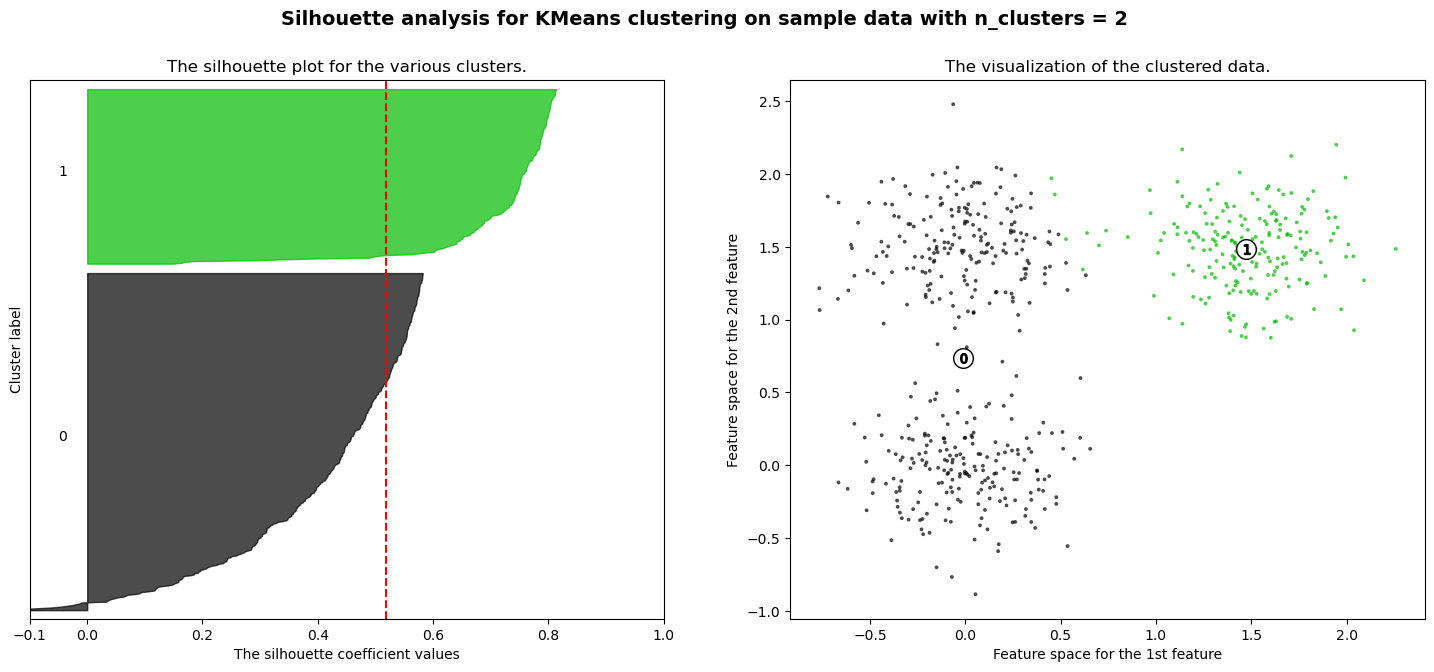

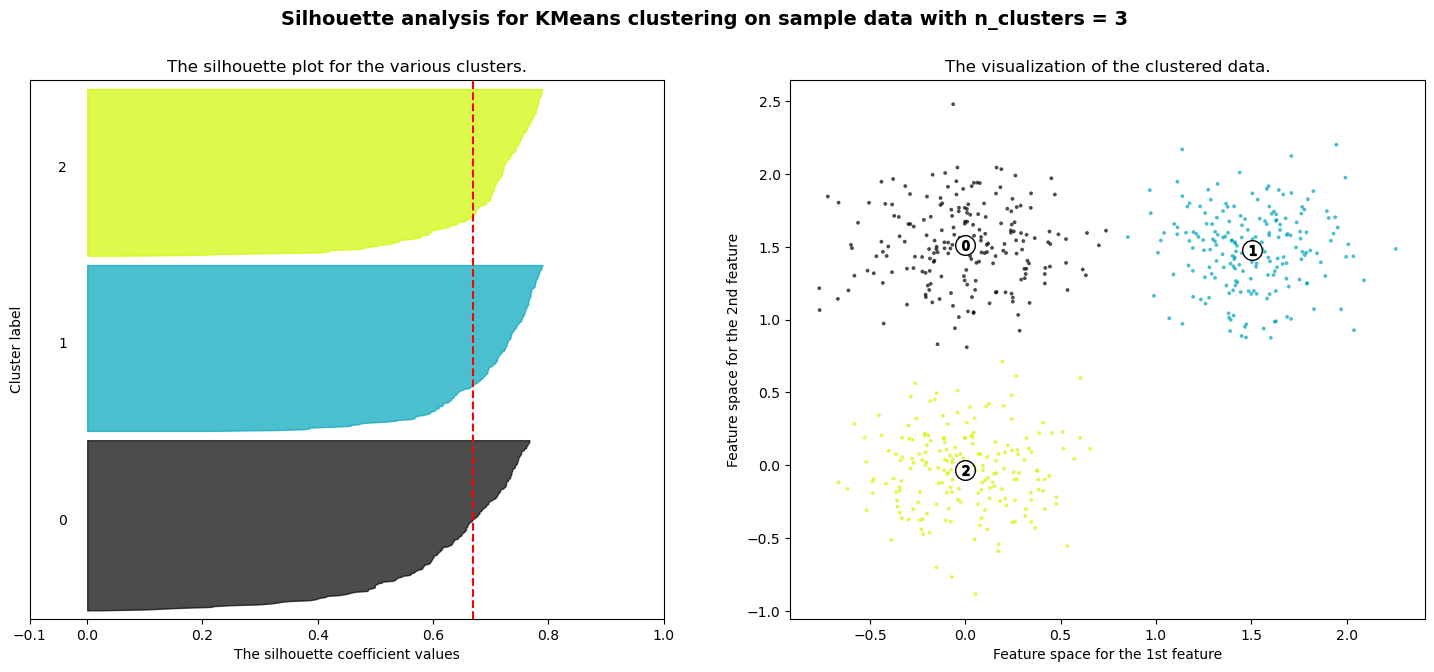

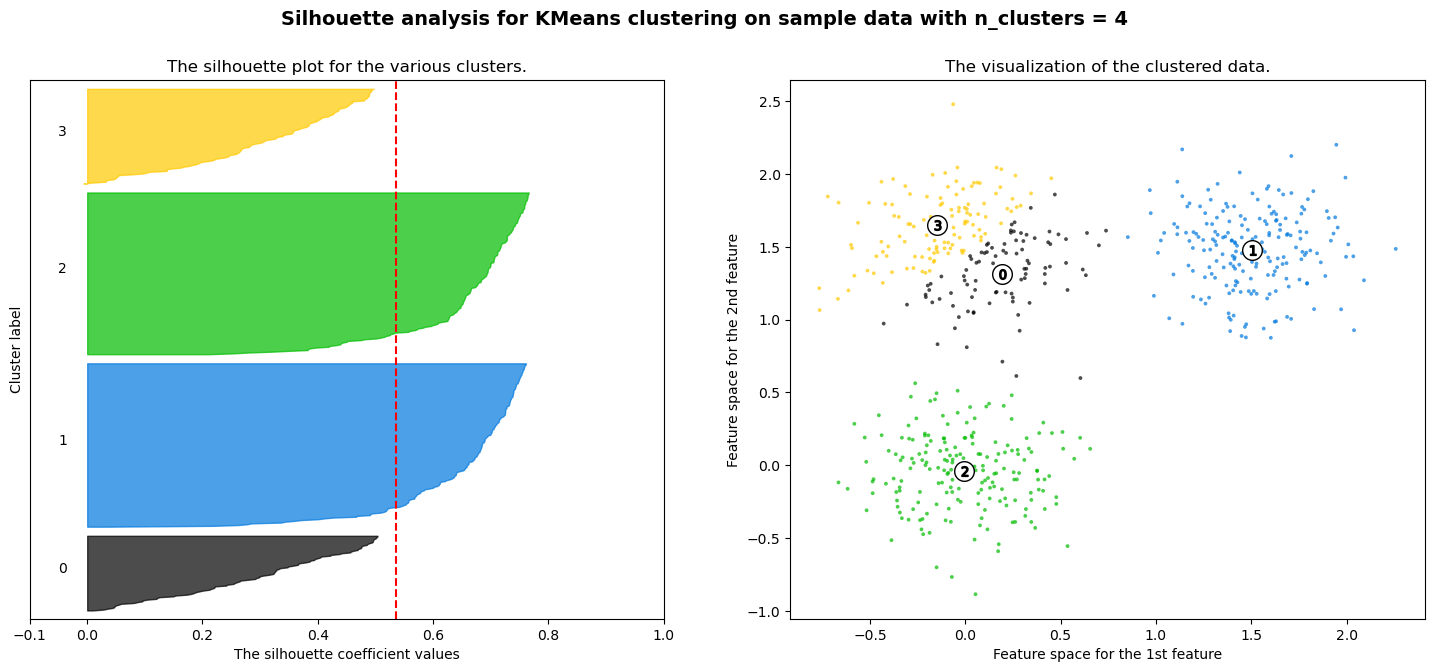

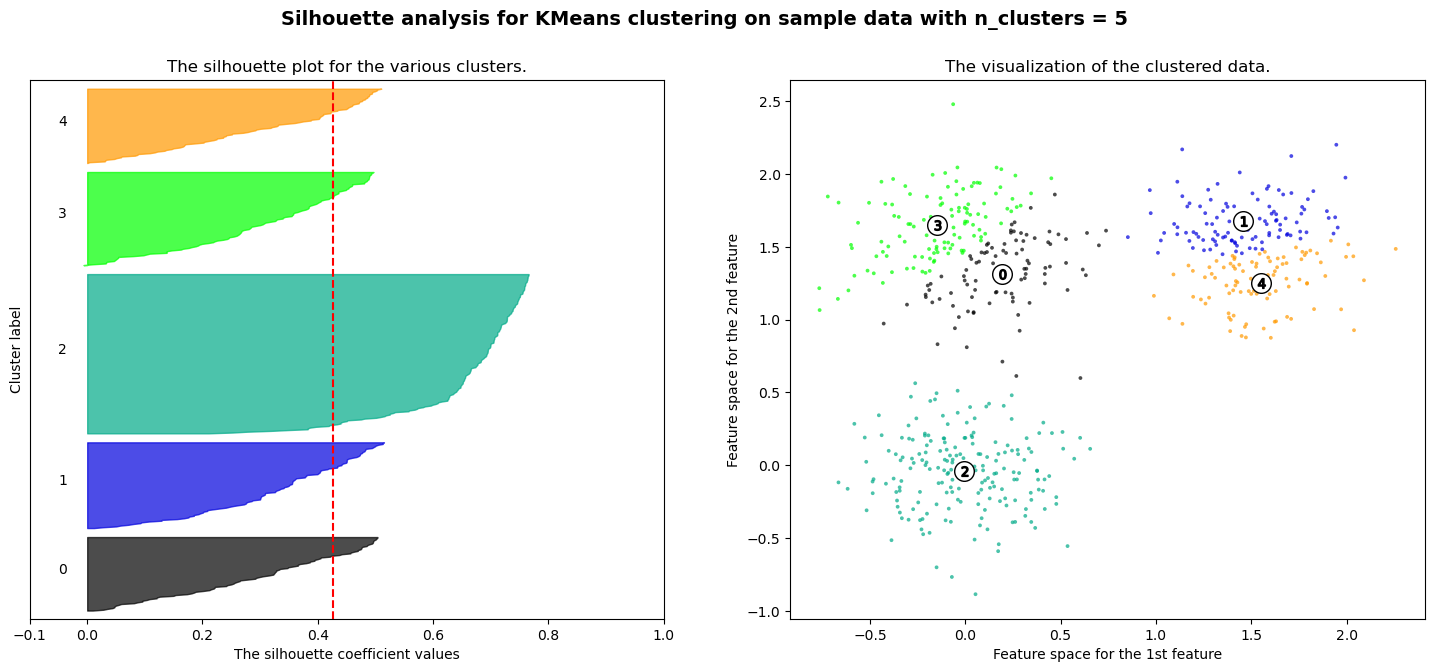

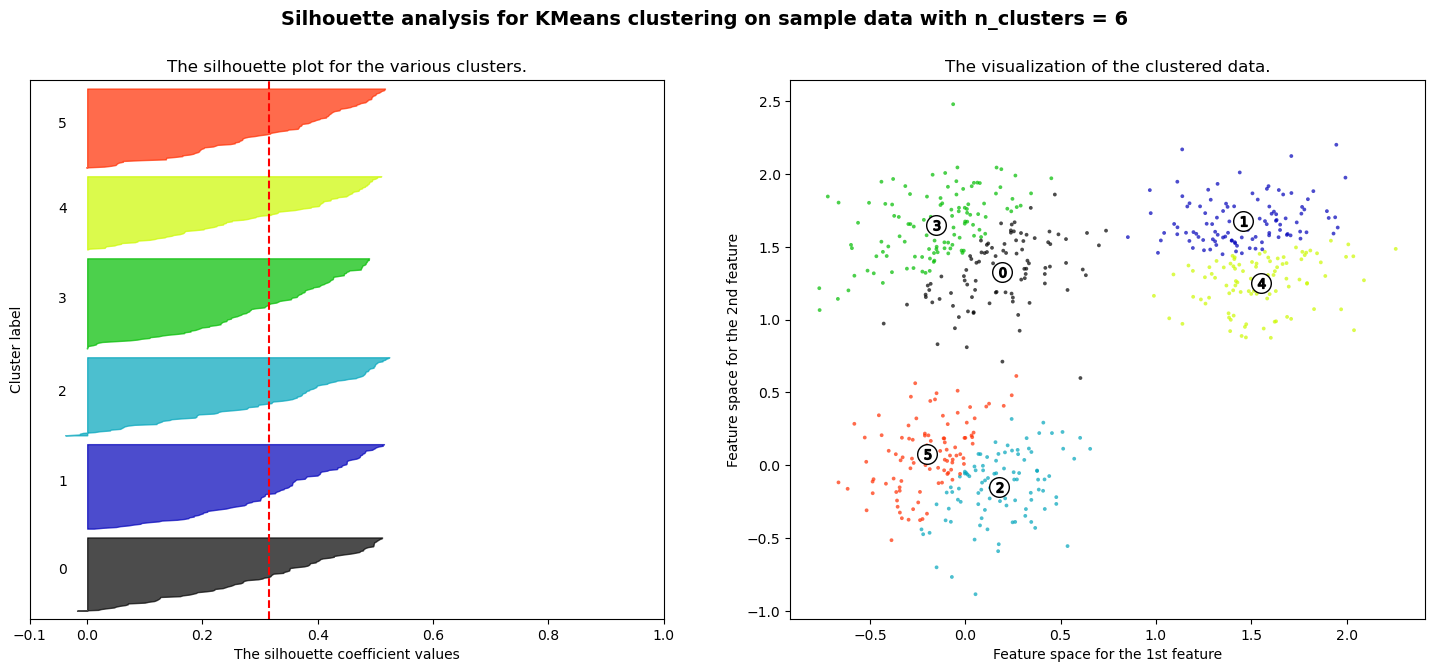

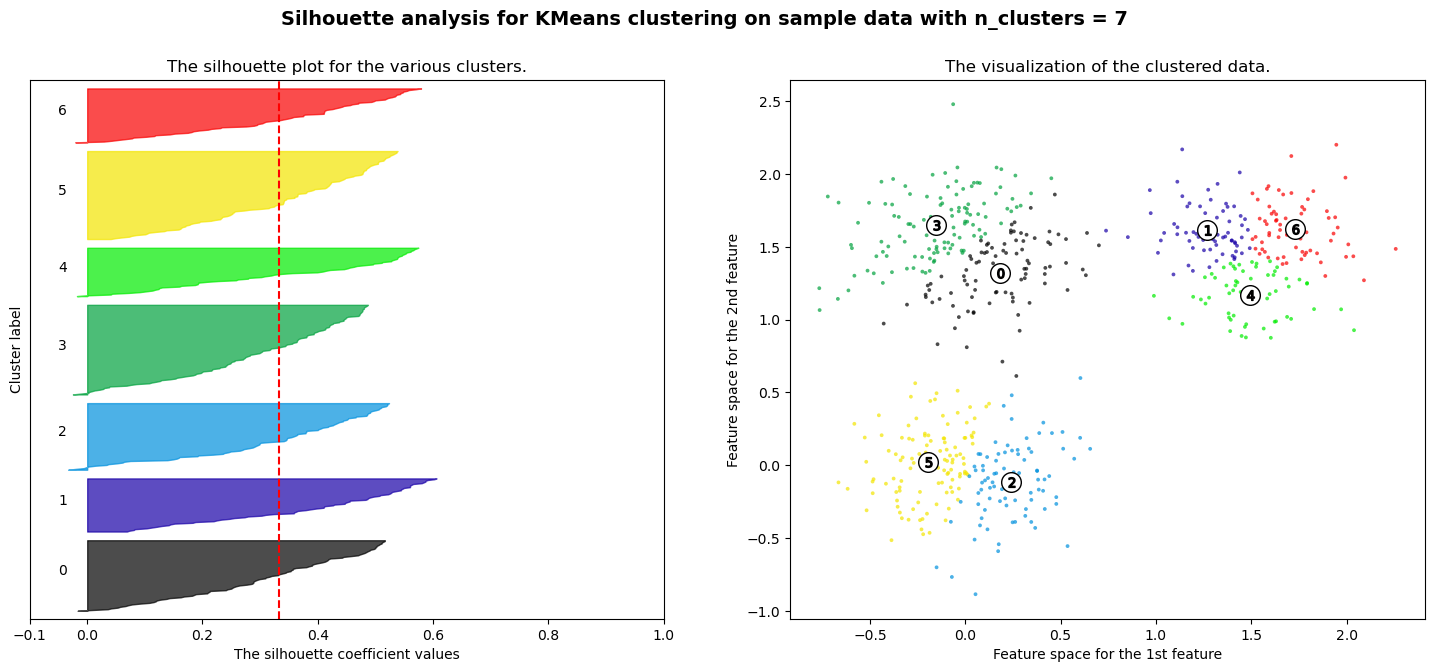

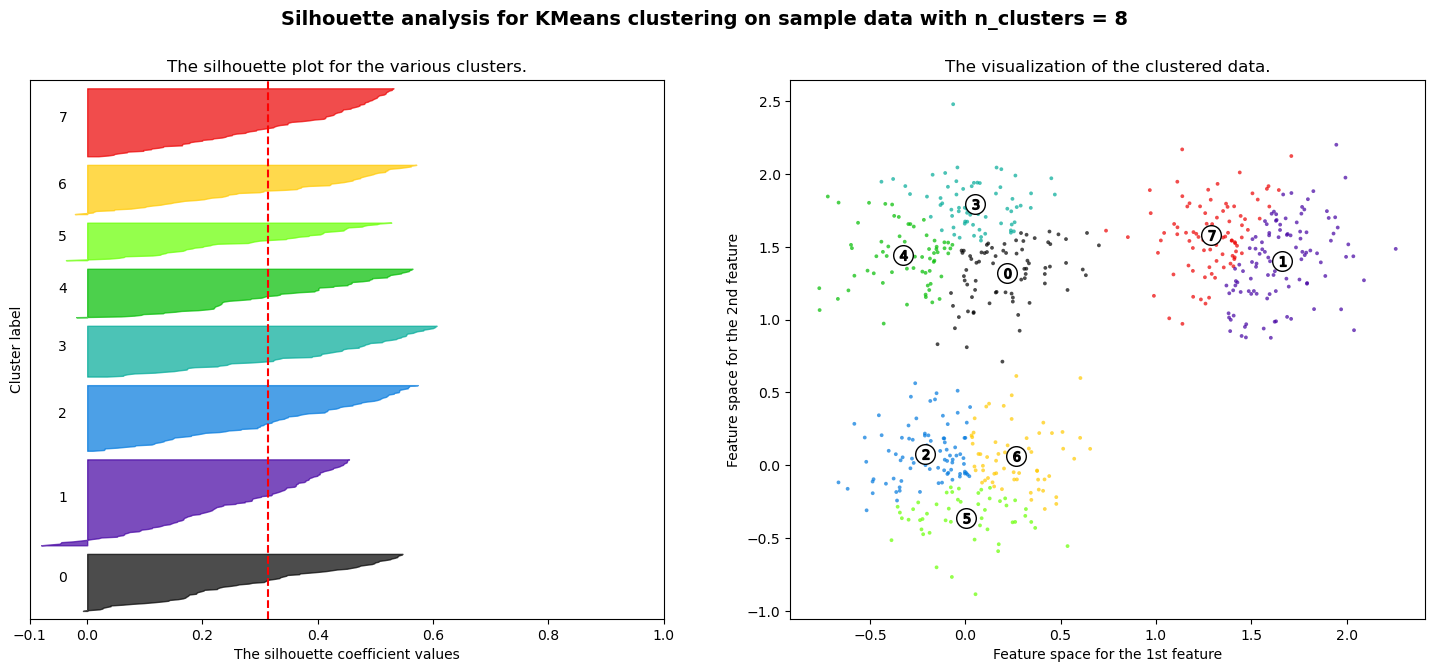

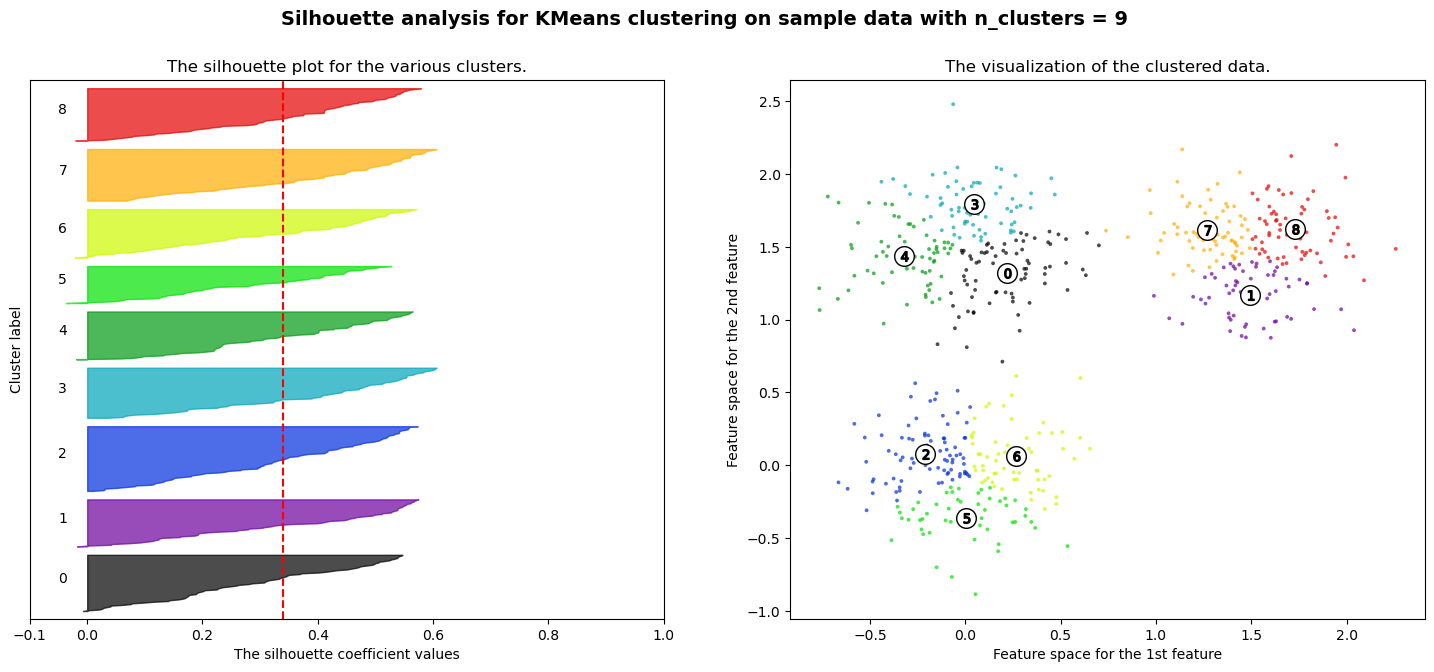

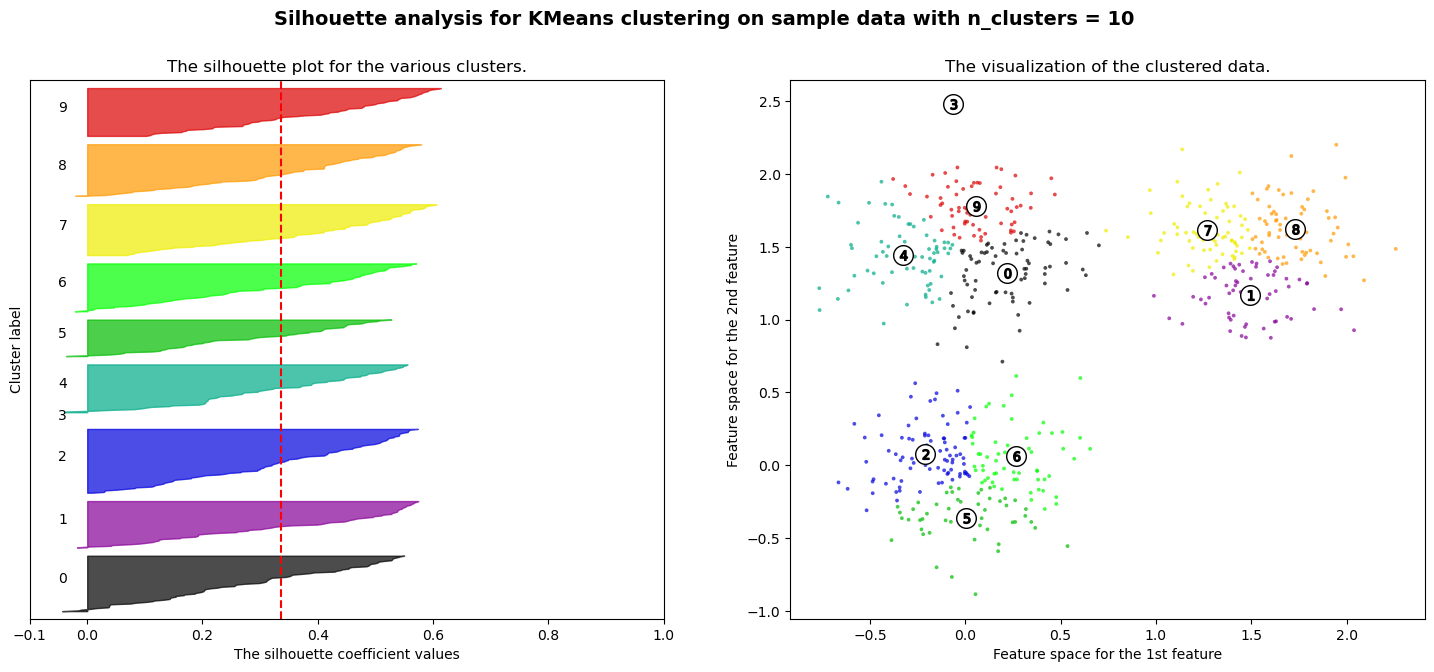

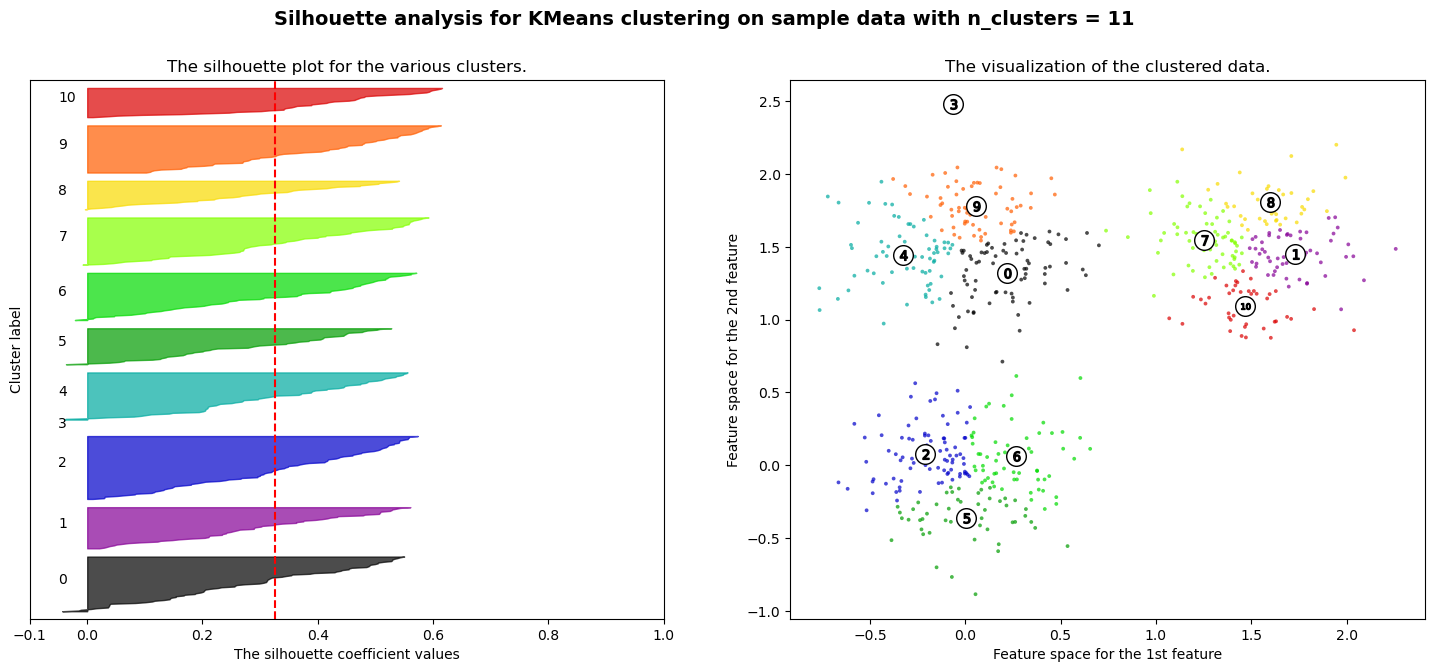

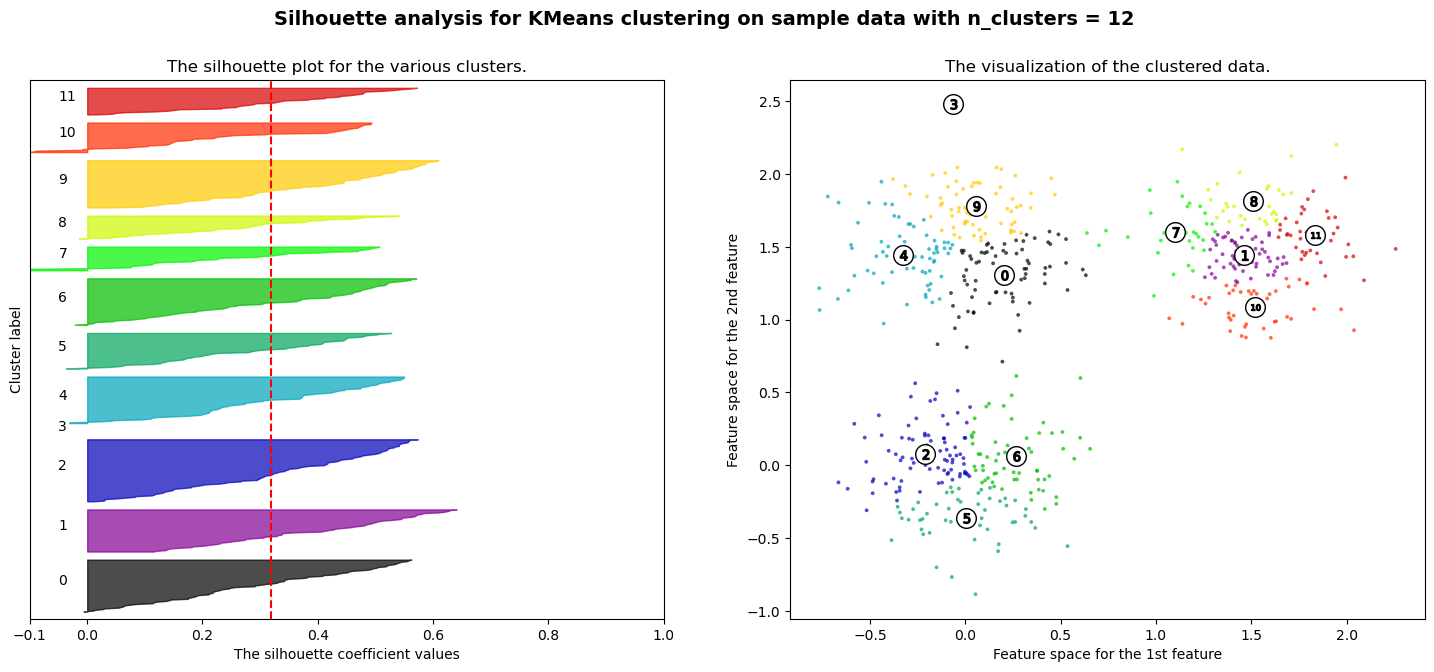

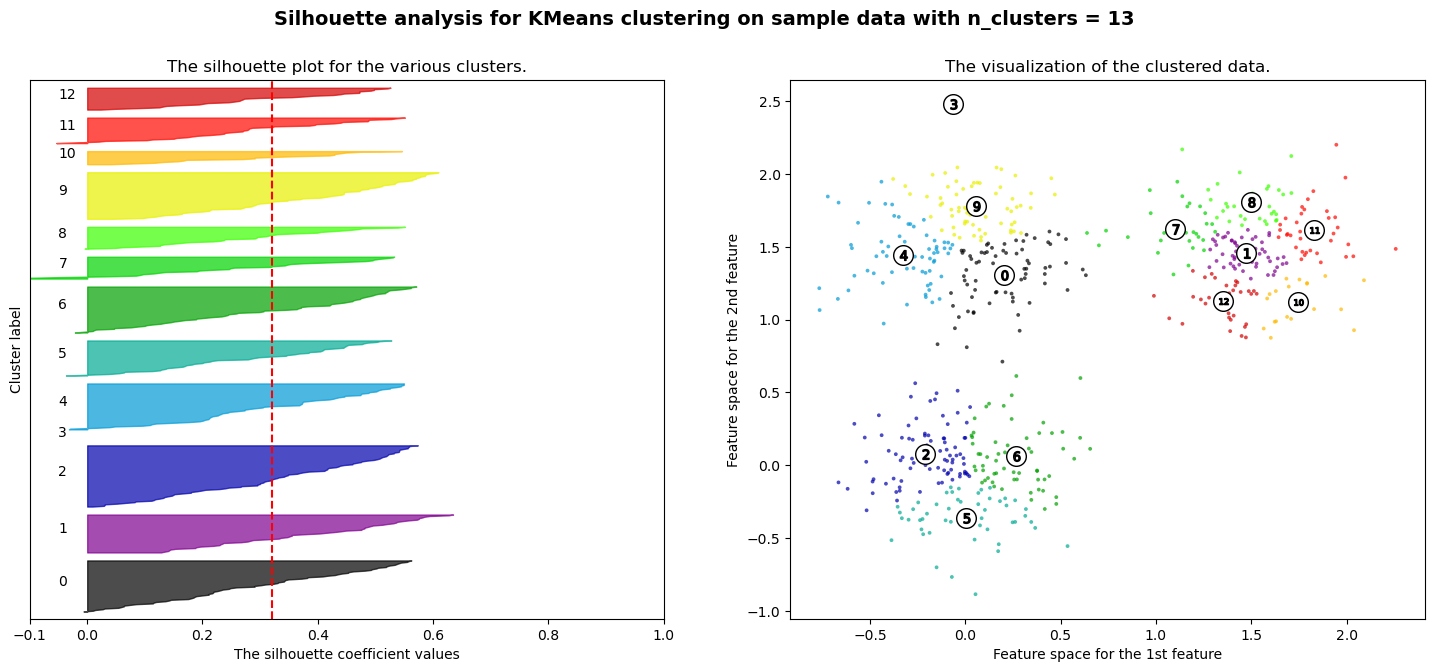

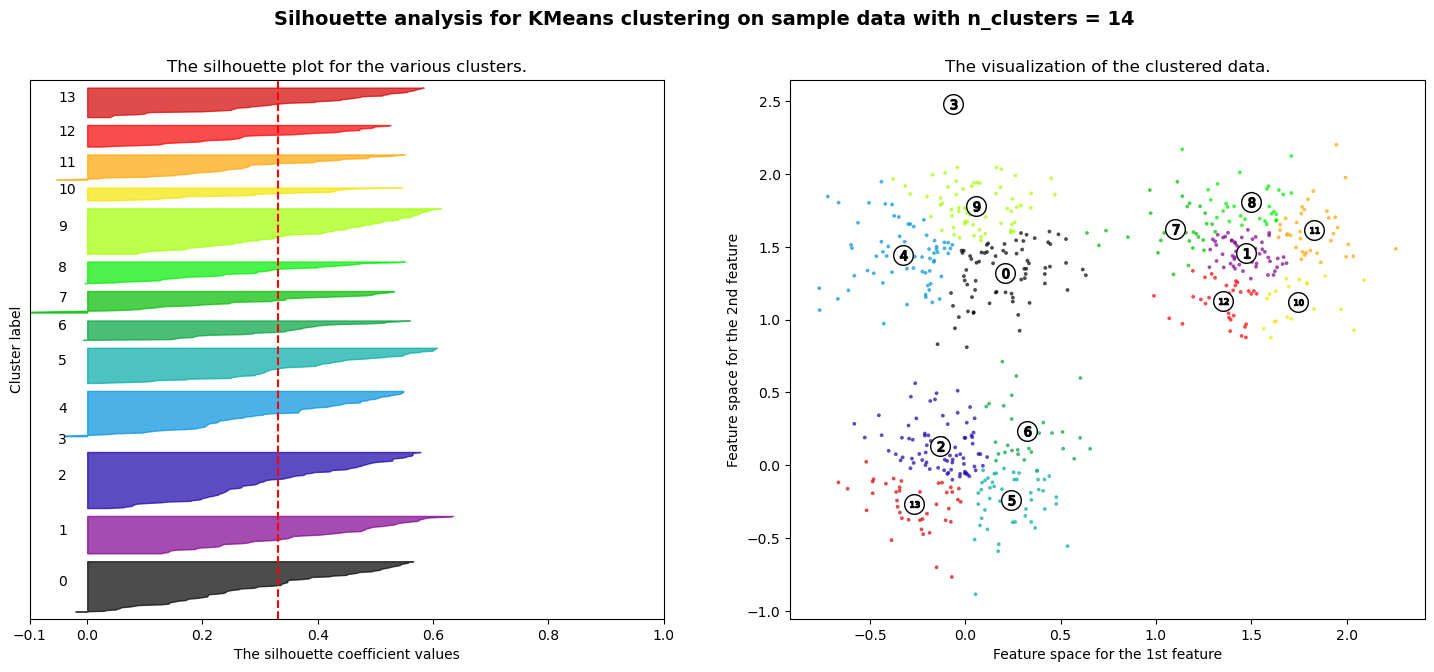

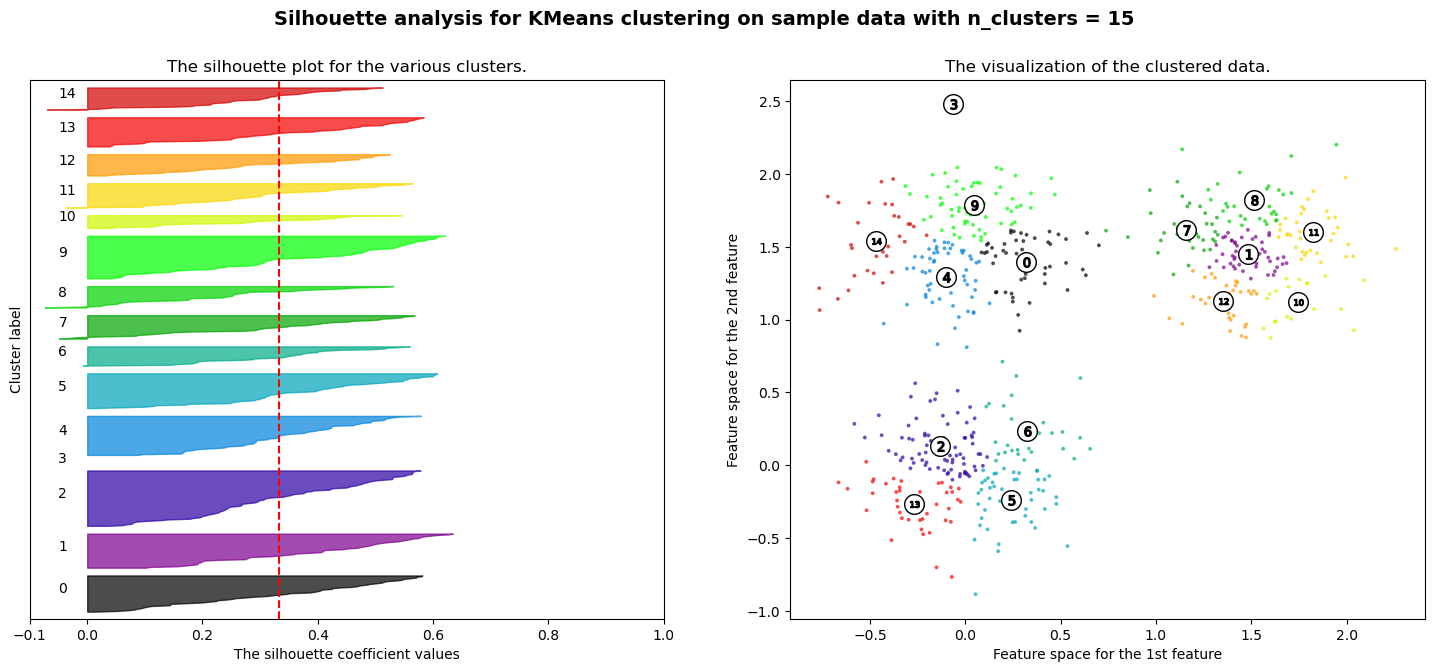

In [14]:
# This section is based on the example located at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

for c in n_cluster[1:]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (c+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (c + 1) * 10])

    # Initialize the clusterer with c value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=c, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_clusters =",
        c,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(c):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / c)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / c)
    ax2.scatter(
        dataset.iloc[:, 0], dataset.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, ctr in enumerate(centers):
        ax2.scatter(ctr[0], ctr[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % c,
        fontsize=14,
        fontweight="bold",
    )

plt.show()